In [1]:
import torch;
import torch.nn as nn;
import matplotlib.pyplot as plt;

In [2]:
x = torch.arange(0,1,0.1).unsqueeze(1)
y = x **2 #Parabola 

In [3]:
x_test = torch.tensor([[0.05],[0.25],[0.45],[0.75],[0.95]])
y_test = x_test*2

In [4]:
model = nn.Sequential(
    nn.Linear(1,16),
    nn.ReLU(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

In [5]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [12]:
# Training loop 
echloes = 200
for echlo in range(echloes):
    model.train()
    y_pred = model(x)
    loss = loss_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if echlo % 20 ==0:
        print(echlo,loss.item())

0 0.517545223236084
20 0.19437511265277863
40 0.17688409984111786
60 0.16484782099723816
80 0.15395736694335938
100 0.14224043488502502
120 0.12842535972595215
140 0.11315598338842392
160 0.09733589738607407
180 0.08700393885374069


In [10]:
model.eval()
test_loss = 0
with torch.inference_mode():
    y_test_pred = model(x_test)
    testLoss = loss_fn(y_test_pred,y_test)

In [11]:
for name, params in model.named_parameters():
    print(name,params.data)

0.weight tensor([[ 0.0348],
        [ 0.6445],
        [ 0.7647],
        [ 0.3600],
        [ 0.4307],
        [ 0.5837],
        [-0.6605],
        [-0.5573],
        [-0.6035],
        [ 0.7441],
        [-0.7425],
        [ 0.9098],
        [ 0.0867],
        [ 0.2729],
        [ 0.7942],
        [-0.1242]])
0.bias tensor([-0.1390,  0.9596, -0.3507, -0.2025,  0.8533, -0.6261, -0.2824,  0.3646,
        -0.1900,  0.7696, -0.1201, -0.3127,  0.6831, -0.2623, -0.1306, -0.8131])
2.weight tensor([[-0.1825,  0.1467, -0.0619, -0.1053,  0.1257, -0.1803,  0.1081,  0.1604,
          0.1457, -0.1838, -0.0895,  0.0137, -0.0233,  0.2320,  0.1451,  0.0316],
        [ 0.0721, -0.2434, -0.1982,  0.1362,  0.0274, -0.0176,  0.0580, -0.0146,
          0.0863, -0.2131, -0.0109,  0.1359,  0.1312,  0.2078, -0.1945,  0.0274],
        [-0.1393, -0.1515,  0.0714, -0.0587,  0.2346,  0.1278, -0.2420,  0.1058,
          0.0814,  0.2099, -0.2154,  0.0575,  0.1253, -0.2190,  0.1225,  0.1622],
        [-0.2127,  0

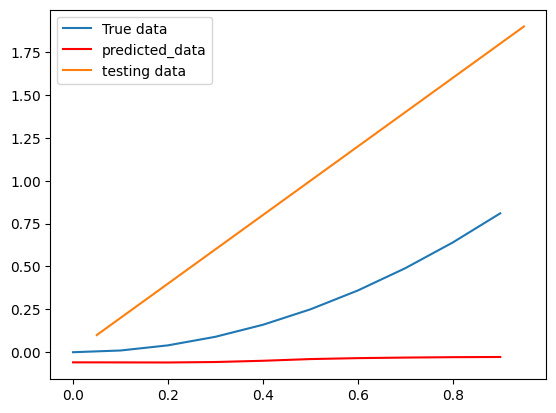

In [12]:
model.eval()
with torch.inference_mode():
    y_pred = model(x)

plt.plot(x , y , label = "True data")
with torch.inference_mode():
    y_pred = model(x)

plt.plot( x , y_pred , color = "red" , label = "predicted_data")
plt.plot(x_test,y_test , label="testing data")
plt.legend()
plt.show()